# Báo Cáo Đồ Án Toán Ứng Dụng Và Thống kê

#### Nhóm Thực hiện
|     MSSV          | Họ và tên              |
|:------------------|------------------------|
|    1712270        |  Đào Đức Anh           |
|    1712019        |  Nguyễn Hoàng Thái Duy |
|    1712861        |  Phan Hữu Tú           |
|    1212043        |  Trịnh Vũ Hoàng        |
|    1712457        |  Nguyễn Khánh Hoàng    |
|    1212777        |  Trần Văn Thạnh        |
| ================= | ====================== |



In [197]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

# Data Overview


Cho tập dữ liệu về một trang mua bán xe hơi cũ. Tập dữu liệu sẽ gồm 2 phần: X sẽ gồm các thông tin về xe, Phần Y là giá mua bán xe.

### Dữ liệu trong Phần X được mô tả như sau:

In [198]:
df_X = pd.read_csv("X_train.csv")
df_X.head()

,id,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,...,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,1,Hyundai,i40,automatic,red,48000,2014,gasoline,gasoline,2.0,...,False,True,False,False,False,True,False,False,True,True
1,2,Mitsubishi,Carisma,mechanical,green,320000,2000,diesel,diesel,1.9,...,False,True,False,False,False,False,False,False,False,False
2,3,Volkswagen,T5,mechanical,white,164000,2011,diesel,diesel,2.0,...,False,True,False,True,False,False,True,True,True,False
3,4,Volkswagen,T4 Multivan,mechanical,blue,385672,1998,diesel,diesel,2.5,...,False,True,True,False,False,False,False,False,True,True
4,5,Toyota,Camry,automatic,black,215652,2005,gasoline,gasoline,2.4,...,False,False,False,False,False,False,False,False,False,True


Bảng dữ liệu ở trên là thông tin của 5 mẫu dữ liệu đầu tiên của tập dữ liệu trong file X_train.csv. Ta có thể thấy được dữ liệu khá rõ ràng, các giá trị của mỗi cột khá trực quan về thông tin của từng mẫu xe.


Thống kê về dữ liệu trong tập dữ liệu này :

In [199]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              30000 non-null  int64  
 1   manufacturer    30000 non-null  object 
 2   model           30000 non-null  object 
 3   transmission    30000 non-null  object 
 4   color           30000 non-null  object 
 5   odometer        30000 non-null  int64  
 6   year            30000 non-null  int64  
 7   engineFuel      30000 non-null  object 
 8   engineType      30000 non-null  object 
 9   engineCapacity  29991 non-null  float64
 10  bodyType        30000 non-null  object 
 11  drivetrain      30000 non-null  object 
 12  photos          30000 non-null  int64  
 13  feature_0       30000 non-null  bool   
 14  feature_1       30000 non-null  bool   
 15  feature_2       30000 non-null  bool   
 16  feature_3       30000 non-null  bool   
 17  feature_4       30000 non-null 

$\implies $X gồm  30,000 dòng tương ứng với thông tin của 30,000 xe được ghi lại thông qua các giao dịch và 23 cột tương ứng với 23 thuộc tính của của xe. Trong đó có 4 thuộc tính là dữ liệu numeric (không tính cột ID),8 thuộc tính categories và 10 thuộc tính kiểu binary. 

| Thuộc tính              | Kiểu dữ liệu | Ý nghĩa                                  |
|:------------------------|:------------:|:----------------------------------------:|
|  manufacturer           |  category    |    Tên nhà sản xuất xe                   |
|  model                  |  category    |    Tên mẫu xe                            |
|  transmission           |  category    |    Loại hộp số                           |
|  color                  |  category    |    Màu xe                                |
|  odmeter                |  float       |    Số Km mà xe đã đi                     |
|  year                   |  integer     |    Năm sản xuất                          |
|  engineFuel             |  category    |    Loại nhiên liệu động cơ               |
|  engineType             |  category    |    Loại động cơ                          |
|  engineCapacity         |  float       |    Dung tích động cơ tính bằng lít       |
|  bodyType               |  category    |    Dạng thân xe                          |
|  driventrain            |  integer     |    Loại hệ thống dẫn động                |
|  photos                 |  integer     |    Số lượng hình ảnh được chụp về xe     |
|  feature0,..., feature9 |  boolean     |    Các đặc trưng khác của xe             |
| ======================= | ============ | =======================================: |

### Dữ liệu trong phần Y được mô tả như sau:


In [200]:
df_Y = pd.read_csv("Y_train.csv")
df_Y.head()

,id,price
0,1,15500.0
1,2,2800.0
2,3,16700.0
3,4,11000.0
4,5,6800.0


<br>Bảng dữ liệu ở trên là 5 dòng dữ liệu đầu tiên trong file Y_train.csv. File này chỉ chứa dữ liệu gồm 2 cột trong đó :
- id: mã số định danh
- price: giá xe tính theo USD

$\implies$ Nối 2 tập X,Y thành một tập dữ liệu thống nhất (df) nhằm mục đích phân tích dữ liệu 

In [201]:
df = df_X.set_index('id').join(df_Y.set_index('id')) # nối 2 tập dữ liệu df_X và df_Y thành một tập dữ liệu chung thông qua thuộc tính ID
df.head()

,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,bodyType,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price
id,,,,,,,,,,,,,,,,,,,,,
1,Hyundai,i40,automatic,red,48000,2014,gasoline,gasoline,2.0,sedan,...,True,False,False,False,True,False,False,True,True,15500.0
2,Mitsubishi,Carisma,mechanical,green,320000,2000,diesel,diesel,1.9,hatchback,...,True,False,False,False,False,False,False,False,False,2800.0
3,Volkswagen,T5,mechanical,white,164000,2011,diesel,diesel,2.0,minibus,...,True,False,True,False,False,True,True,True,False,16700.0
4,Volkswagen,T4 Multivan,mechanical,blue,385672,1998,diesel,diesel,2.5,minibus,...,True,True,False,False,False,False,False,True,True,11000.0
5,Toyota,Camry,automatic,black,215652,2005,gasoline,gasoline,2.4,sedan,...,False,False,False,False,False,False,False,False,True,6800.0


Trên đây là 5 mẫu dữ liệu của tập dữ liệu **df** bao gồm cả 2 phần thuộc tính (X) và giá xe (Y) đã được đọc từ file X_train.csv và file y_train.csv

# Data Preprocessing 

### 1. Check null values

In [202]:
df.isnull().sum() # hàm xác định số lượng trường dữ liệu bị thiếu ở mỗi cột

manufacturer      0
model             0
transmission      0
color             0
odometer          0
year              0
engineFuel        0
engineType        0
engineCapacity    9
bodyType          0
drivetrain        0
photos            0
feature_0         0
feature_1         0
feature_2         0
feature_3         0
feature_4         0
feature_5         0
feature_6         0
feature_7         0
feature_8         0
feature_9         0
price             0
dtype: int64

Đa số các thuộc tính đều khộng bị **Missing data** trừ cột **engineCapacity** bị thiếu dữ liệu ở 9 dòng

In [203]:
df['engineCapacity'].fillna(df['engineCapacity'].median(),inplace = True)


Vì số lượng dữ liệu bị thiếu là rất nhỏ nên ta thay thế các giá trị bị thiếu trong cột **engineCapacity** bằng giá trị Median của những mẫu dữ liệu đang có


In [204]:
df.isnull().sum()

manufacturer      0
model             0
transmission      0
color             0
odometer          0
year              0
engineFuel        0
engineType        0
engineCapacity    0
bodyType          0
drivetrain        0
photos            0
feature_0         0
feature_1         0
feature_2         0
feature_3         0
feature_4         0
feature_5         0
feature_6         0
feature_7         0
feature_8         0
feature_9         0
price             0
dtype: int64

### 2. Check duplicate values


In [205]:
df.duplicated().sum()

25

$\implies$ trong tập dữ liệu này có 25 trường dữ liệu bị trùng lắp nhau


In [206]:
duplicated_df = df[df.duplicated()]
duplicated_df

,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,bodyType,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price
id,,,,,,,,,,,,,,,,,,,,,
4242,Skoda,Octavia,mechanical,grey,159000,2009,gasoline,gasoline,1.8,universal,...,False,False,False,False,False,False,False,False,False,8000.0
7808,Renault,19,mechanical,blue,99999,1992,gasoline,gasoline,1.7,sedan,...,False,False,False,False,False,False,False,False,False,10.0
9005,Volkswagen,Golf,mechanical,grey,149000,2015,diesel,diesel,1.6,universal,...,True,False,False,False,True,True,False,True,True,12600.0
9343,Renault,Fluence,mechanical,black,167817,2011,diesel,diesel,1.5,sedan,...,True,False,False,False,False,False,False,True,True,8500.0
10191,Hyundai,Atos,mechanical,silver,150000,2004,gasoline,gasoline,1.1,hatchback,...,False,False,False,False,False,False,False,False,False,3300.0
12817,Citroen,Xantia,mechanical,silver,520000,1998,diesel,diesel,2.1,universal,...,True,False,False,False,False,False,False,False,False,1000.0
13213,Volvo,850,mechanical,blue,300000,1994,diesel,diesel,2.0,sedan,...,True,False,False,True,True,False,False,True,True,2350.0
14585,Audi,A4,mechanical,blue,325000,2002,diesel,diesel,2.5,universal,...,False,False,False,False,False,False,False,False,False,5650.0
14847,Daewoo,Matiz,mechanical,other,221000,2006,gasoline,gasoline,1.0,hatchback,...,False,False,False,False,False,False,False,False,False,950.0


Bảng dữ liệu ở trên là danh sách 25 hàng dữ liệu bị trùng lắp (Không tính hàng dữ liệu mà đã suất hiện trước đó) 

$\implies$ Ta tiến hành xóa các hàng dữ liệu này

In [207]:
df.drop_duplicates(inplace=True,ignore_index=True)
df

,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,bodyType,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price
0,Hyundai,i40,automatic,red,48000,2014,gasoline,gasoline,2.0,sedan,...,True,False,False,False,True,False,False,True,True,15500.0
1,Mitsubishi,Carisma,mechanical,green,320000,2000,diesel,diesel,1.9,hatchback,...,True,False,False,False,False,False,False,False,False,2800.0
2,Volkswagen,T5,mechanical,white,164000,2011,diesel,diesel,2.0,minibus,...,True,False,True,False,False,True,True,True,False,16700.0
3,Volkswagen,T4 Multivan,mechanical,blue,385672,1998,diesel,diesel,2.5,minibus,...,True,True,False,False,False,False,False,True,True,11000.0
4,Toyota,Camry,automatic,black,215652,2005,gasoline,gasoline,2.4,sedan,...,False,False,False,False,False,False,False,False,True,6800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29970,Acura,TSX,automatic,black,252000,2008,gasoline,gasoline,2.4,sedan,...,True,True,False,True,True,False,True,True,True,9500.0
29971,Ford,Mondeo,mechanical,red,290000,1997,gasoline,gasoline,1.8,sedan,...,False,False,False,False,False,False,False,False,False,1750.0
29972,Mitsubishi,Galant,mechanical,grey,250000,1993,gasoline,gasoline,2.0,hatchback,...,False,False,False,False,False,False,False,False,True,1400.0
29973,Opel,Astra,mechanical,silver,267000,2002,diesel,diesel,1.7,universal,...,True,False,False,False,False,False,False,False,True,3700.0


$\implies$Sau khi thực hiện xóa các dòng dữ liệu bị trùng thì ta còn lại 29975 dòng trong tập dữ liệu

# Data visualization

### 1. price 

* Các giá trị thống kê cơ bản của cột price là:

In [208]:
df[['price']].describe()

,price
count,29975.000000
mean,6600.751320
std,6097.033735
min,1.000000
25%,2300.000000
50%,4900.000000
75%,8999.000000
max,50000.000000


Thống kê cho thấy giá trị trung bình giá xe trong tập dữ liệu là 6,600USD với độ lệch chuẩn là 6097USD, Giá xe được bán nhỏ nhất là 1USD cao nhất là 50,000USD

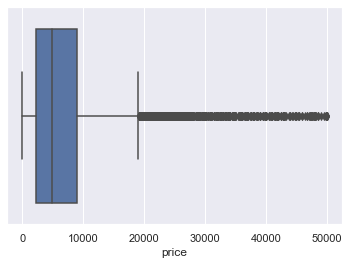

In [209]:
sns.boxplot(df['price'])

Theo dữ liệu thống thì ta thấy giá trị nhỏ nhất ở cột là là 1(USD), điều khá là vô lý khi đây là dữ liệu mua bán xe.

In [210]:
df[df['price']<100]

,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,bodyType,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price
5691,Mercedes-Benz,T1,mechanical,white,450000,1990,diesel,diesel,2.9,van,...,False,False,False,False,False,False,False,False,False,1.42
6073,Renault,19,mechanical,blue,99999,1992,gasoline,gasoline,1.7,sedan,...,False,False,False,False,False,False,False,False,False,10.00
15792,Mazda,626,mechanical,black,300000,1987,gasoline,gasoline,2.0,coupe,...,False,False,False,False,False,False,False,False,True,1.00
17141,Volkswagen,T4 Caravelle,mechanical,white,1,1995,diesel,diesel,2.4,minibus,...,False,False,False,False,False,False,False,False,False,1.00


Bảng dữ liệu trên là tập các dòng dữ liệu có giá xe thấp hơn 100USD. Có vẻ đây là những điểm dữ liệu nhiễu vì trên thực tế giá của những dòng xe này không thể nhỏ như vậy., ta sẽ loại khỏi tập dữ liệu

In [211]:
indexs = df[ df.price <= 10 ].index
df.drop(indexs,axis = 0,inplace = True)
df.reset_index(drop=True,inplace=True)
df

,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,bodyType,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price
0,Hyundai,i40,automatic,red,48000,2014,gasoline,gasoline,2.0,sedan,...,True,False,False,False,True,False,False,True,True,15500.0
1,Mitsubishi,Carisma,mechanical,green,320000,2000,diesel,diesel,1.9,hatchback,...,True,False,False,False,False,False,False,False,False,2800.0
2,Volkswagen,T5,mechanical,white,164000,2011,diesel,diesel,2.0,minibus,...,True,False,True,False,False,True,True,True,False,16700.0
3,Volkswagen,T4 Multivan,mechanical,blue,385672,1998,diesel,diesel,2.5,minibus,...,True,True,False,False,False,False,False,True,True,11000.0
4,Toyota,Camry,automatic,black,215652,2005,gasoline,gasoline,2.4,sedan,...,False,False,False,False,False,False,False,False,True,6800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29966,Acura,TSX,automatic,black,252000,2008,gasoline,gasoline,2.4,sedan,...,True,True,False,True,True,False,True,True,True,9500.0
29967,Ford,Mondeo,mechanical,red,290000,1997,gasoline,gasoline,1.8,sedan,...,False,False,False,False,False,False,False,False,False,1750.0
29968,Mitsubishi,Galant,mechanical,grey,250000,1993,gasoline,gasoline,2.0,hatchback,...,False,False,False,False,False,False,False,False,True,1400.0
29969,Opel,Astra,mechanical,silver,267000,2002,diesel,diesel,1.7,universal,...,True,False,False,False,False,False,False,False,True,3700.0


Sau khi thực hiện xóa các dữ liệu nhiễu ta còn lại 29971 dòng dữ liệu

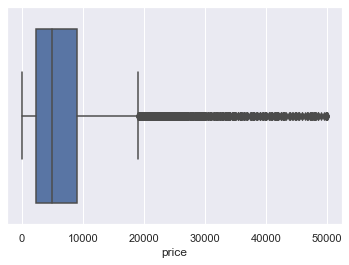

In [212]:
sns.boxplot(df['price'])

In [213]:
df[['price']].describe()

,price
count,29971.000000
mean,6601.631824
std,6096.964149
min,100.000000
25%,2300.000000
50%,4900.000000
75%,8999.000000
max,50000.000000


* kiểm tra phân bố của các giá trị

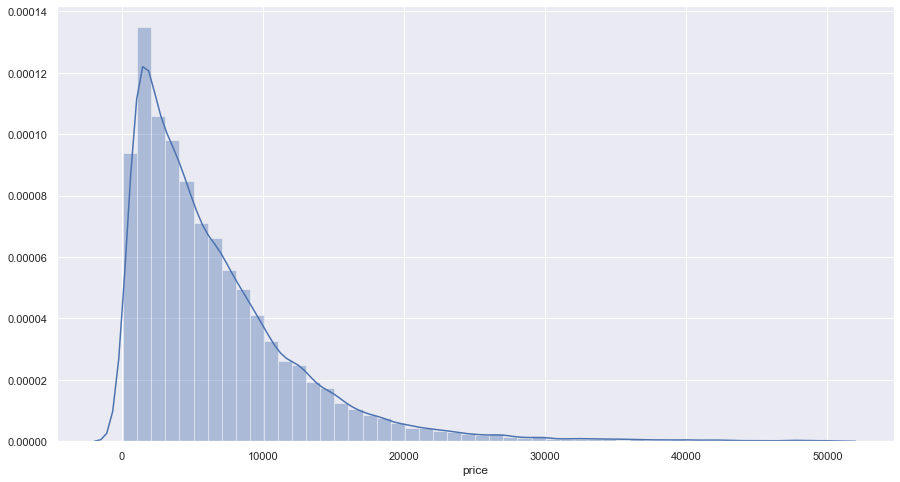

In [214]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(df['price'])

$\implies$ từ biểu đồ historgram ta nhận thấy được rằng class price của tập dữ liệu khá lệch 

kiểm tra lại với hàm của thư viện pandas ta có thể thấy được độ lệch cũng khá lớn 


In [215]:
print(df['price'].skew())


2.174618513167536


Ta biến đổi giá trị của cột này bằng các biến đổi khác nhau như log-transform, root squared tansform và cube root transform để xem thử có cải thiện được tình trạng dữ liệu bị lệch hay không 

##### a) log transform

In [216]:
price_df = pd.DataFrame(np.log1p(df['price'].values))
price_df.head()

,0
0,9.648660
1,7.937732
2,9.723224
3,9.305741
4,8.824825


Bảng trên là 5 dòng dữ liệu của giá xe sau khi biến đổi Log transform

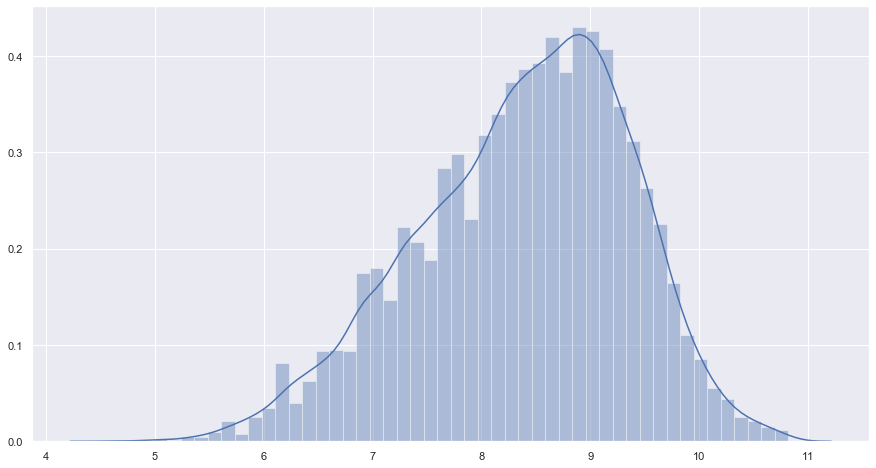

In [217]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(price_df)

có vẻ đã cải thiện được chút ít

In [218]:
price_df[0].skew()

-0.4118552363680861

$\implies$ có cải thiện so với   dữ liệu ban đầu nhưng vẫn còn khá lệch

##### b) root squared  transform

Tập giá xe sau khi biến đổi Root Square transform

In [219]:
price_df = pd.DataFrame(np.sqrt(df['price'].values))
price_df.head()

,0
0,124.498996
1,52.915026
2,129.228480
3,104.880885
4,82.462113


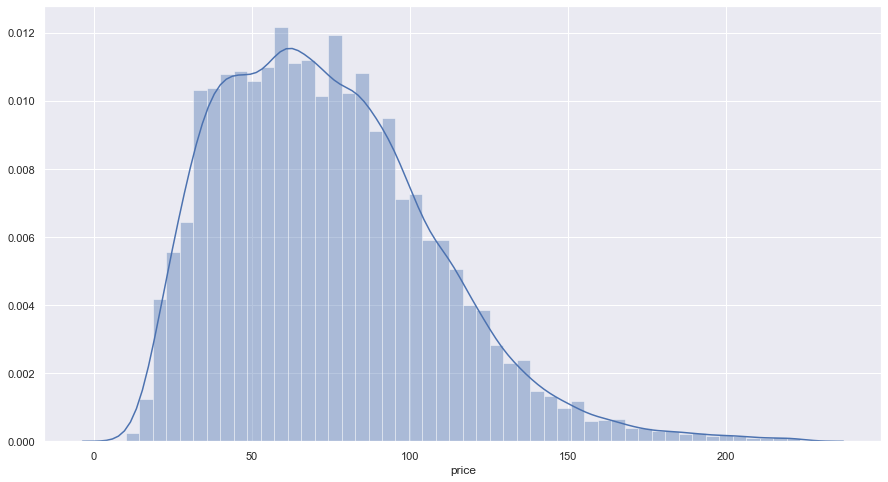

In [220]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(np.sqrt(df['price']))

In [221]:
price_df[0].skew()

0.7645352759996838

$\implies$ Phép biến đổi này cho kết quả không tốt so với Log transform

##### c) Root Cube transform

In [222]:
price_df = pd.DataFrame((df['price'].values)**(1/3))
price_df.head()

,0
0,24.933155
1,14.094597
2,25.560666
3,22.239801
4,18.945365


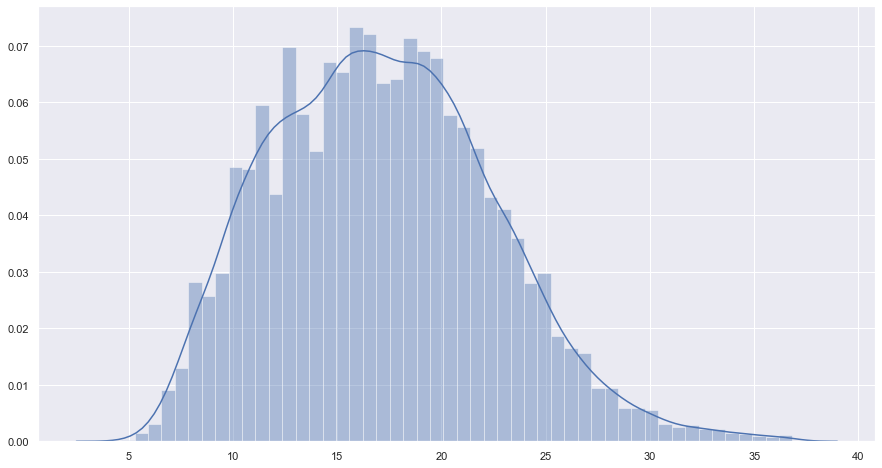

In [223]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(price_df)

In [224]:
price_df[0].skew()

0.36376050170582264

$\implies$ phép biến đổi này cho kết quả tốt nhất $\implies$ ta sẽ sử dụng phép biến đổi này để áp dụng khi huấn luyện mô hình

### 2. Manufacturer 

Đây là cốt chứa thông tin của nhà sản xuất của các xe, ta sẽ khảo sát về phân bố và ảnh hưởng của thuộc tính này với giá của xe

In [225]:
names = df['manufacturer'].unique() # in ra danh sách các nhà sản xuất
names

array(['Hyundai', 'Mitsubishi', 'Volkswagen', 'Toyota', 'Chery', 'Opel',
       'Audi', 'Nissan', 'Dodge', 'Kia', 'Fiat', 'Ford', 'Mercedes-Benz',
       'Renault', 'Seat', 'Mazda', 'Peugeot', 'BMW', 'Chrysler',
       'Chevrolet', 'Citroen', 'Skoda', 'Lifan', 'Cadillac', 'Subaru',
       'Land Rover', 'Jeep', 'Volvo', 'Infiniti', 'Honda', 'Lexus',
       'Lancia', 'Jaguar', 'Buick', 'Suzuki', 'SsangYong', 'Rover',
       'Pontiac', 'Iveco', 'Acura', 'Porsche', 'Lincoln', 'Daewoo',
       'Dacia', 'Saab', 'Mini', 'LADA', 'Great Wall', 'Alfa Romeo',
       'Geely'], dtype=object)

In [226]:
print('Tổng cổng có {} hãng sản xuất có trong tập dữ liệu này!'.format(len(df.manufacturer.unique())))

Tổng cổng có 50 hãng sản xuất có trong tập dữ liệu này!


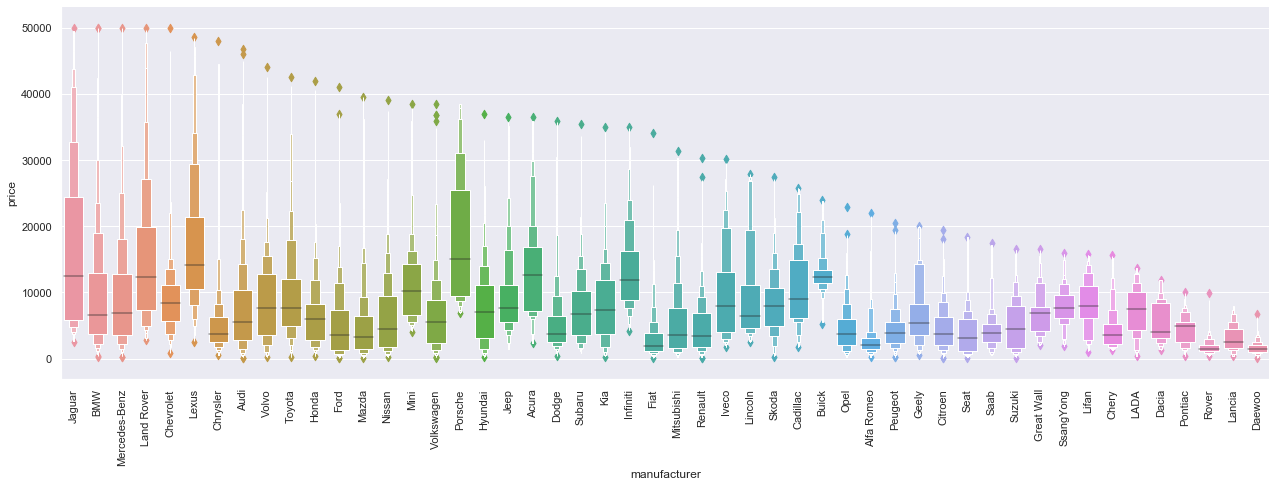

In [227]:
var = 'manufacturer'
sns.catplot(y='price',x=var,data= df.sort_values('price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show
plt.xticks(rotation=90);

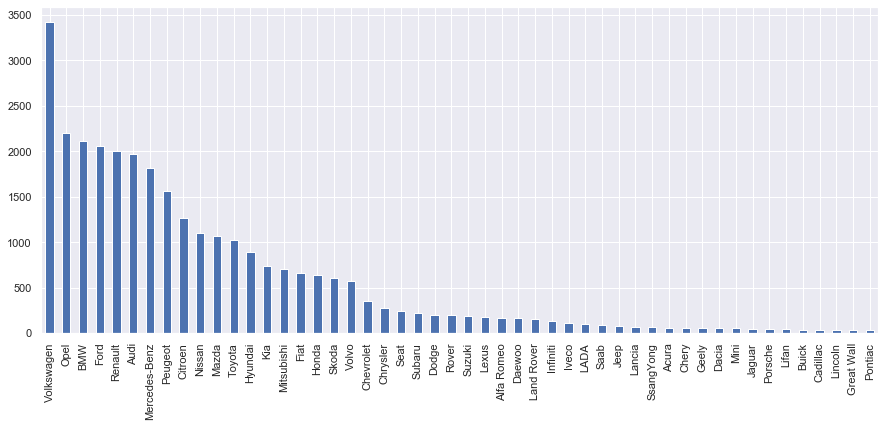

In [228]:
df['manufacturer'].value_counts().plot(kind = 'bar',figsize =(15,6))

<br> - Dữ liệu của thuộc tính này là Category với tên của các nhà sản xuất xe.
<br> - Theo biểu đồ trên thì có ta thấy được Janguar có phân bố giá xe cao nhất
<br> - Và mỗi loại nhà sản xuất sẽ có các khoảng phân bố giá khác nhau, nên có lẽ thuộc tính này sẽ giúp ta dự đoán giá tốt hơn, trên thực tế thì giá trị của một chiếc xe cũng sẽ được ảnh hưởng rất lớn bởi nhà sản xuất


#### 2. Model

Mỗi loại xe lại có các mẫu xe khác nhau, ta sẽ khảo sát thuộc tính mẫu xe của tập dữ liệu

In [229]:
print('Tông cổng có {} mẫu xe trong tập dữ liệu '.format(len(df['model'].unique())))

Tông cổng có 992 mẫu xe trong tập dữ liệu 


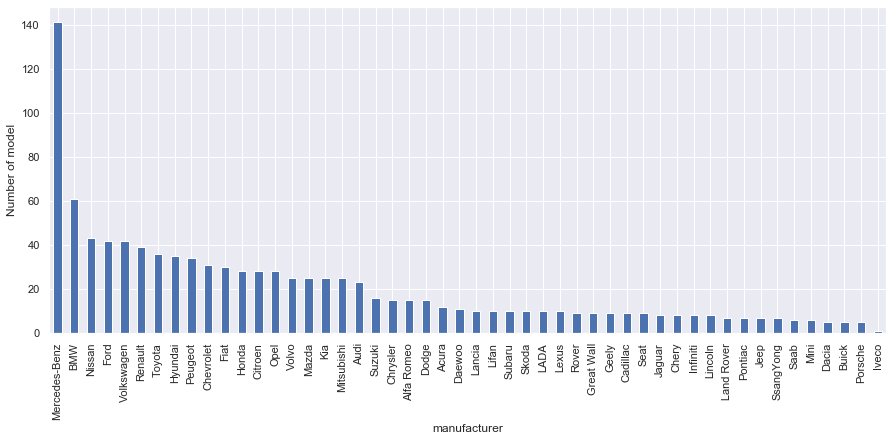

In [230]:
s = df.groupby("manufacturer").model.agg(lambda x:len(x.unique()))
s.sort_values(ascending= False).plot(kind="bar",figsize=(15,6))
plt.ylabel("Number of model");

Biểu đồ cột Tập dữ liệu này có khá nhiều loại model và mỗi loại nhà sản xuất lại có số lượng model khác nhau. Và Mercedes  là nhà sản xuất có nhiều model nhất

In [231]:
# var = 'model'
# sns.catplot(y='price',x=var,data= df.sort_values('price',ascending=False),kind="boxen",height=6, aspect=3)
# plt.show
# plt.xticks(rotation=90);

tuy nhiên mỗi model lại có khoảng phân bố giá khác nhau, nên sẽ ảnh hưởng nhiều đến giá trị của xe

#### 4. Transmisssion

<br> Đây là thuộc tính category thể hiện loại hộp số của xe.

<br> Tập giá trị của thuộc tính này là :

In [232]:
df.transmission.unique()

array(['automatic', 'mechanical'], dtype=object)

Số điểm dữ liệu của mỗi loại hộp số là:

In [233]:
var = 'transmission'
df[var].value_counts()

mechanical    19906
automatic     10065
Name: transmission, dtype: int64

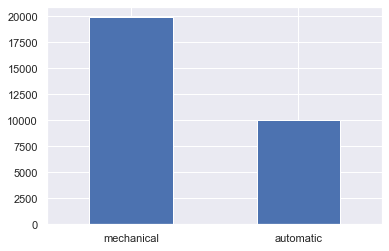

In [234]:
df[var].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0);

Phân bô dữ liệu của mỗi loại hộp số theo giá tiền xe:

<function matplotlib.pyplot.show(*args, **kw)>

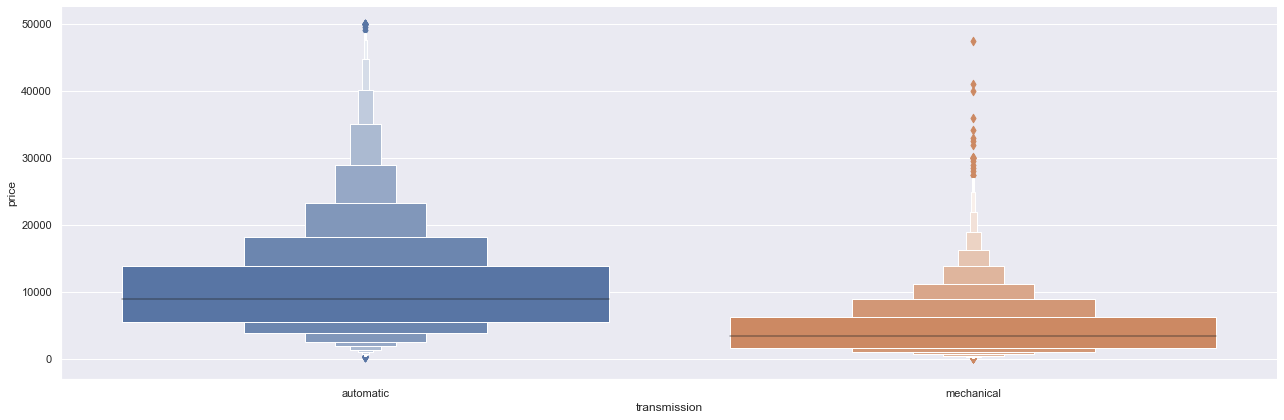

In [235]:
sns.catplot(y='price',x=var,data= df.sort_values('price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

Theo biểu đồ trên thì có vẻ hộp số tự động sẽ có giá tiền cao hơn, tuy nhiên miền giá của cả 2 loại khá rộng

Tuy nhiên theo biểu đồ thì có vẻ loại hộp số sàn có vẻ có outlier

In [236]:
 df[(df['transmission'] == 'mechanical') & (df['price'] > 35000)]

,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,bodyType,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price
18750,Land Rover,Defender,mechanical,green,30452,2014,diesel,diesel,2.2,suv,...,True,True,False,False,True,False,False,False,False,39900.0
22274,Mercedes-Benz,Sprinter,mechanical,white,340000,2014,diesel,diesel,2.2,minibus,...,True,True,False,False,False,False,False,True,True,41000.0
25475,Lexus,NX,mechanical,white,10,2019,gasoline,gasoline,2.0,suv,...,False,False,False,False,False,False,False,False,False,47400.0
27418,Toyota,Land Cruiser,mechanical,blue,284000,2009,diesel,diesel,4.2,suv,...,False,False,False,True,False,False,False,False,False,36000.0


Bảng dữ liệu trên là tập các cột dữ liệu xe có cơ chế hộp số cơ nhưng lại có giá cao hơn 35,000USD. Sau khi tìm hiểu thì đây không phải là các dữ liệu nhiễu vì là dòng xe cao cấp do đó mặc dù là hộp số cơ những lại có giá trị khá cao

#### 5.color

In [237]:
var = 'color'
df[var].value_counts()

black     6110
silver    5420
blue      4506
white     3243
grey      2995
red       2265
green     2033
other     2023
brown      660
violet     371
yellow     212
orange     133
Name: color, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

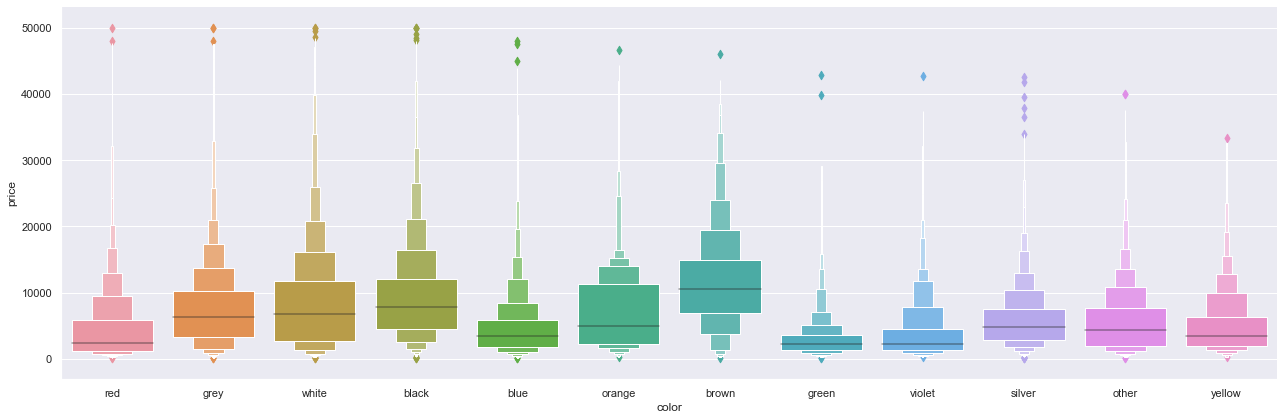

In [238]:
sns.catplot(y='price',x=var,data= df.sort_values('price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

Theo biểu đồ thì phân bố giá của xe theo loại màu khá tương đồng nhau. Giá trị trung vị ở mỗi loại màu xe không chênh lệch quá nhiều.

#### 6.odmeter

Đây là thuộc tính thể hiện số lượng km đã đi của xe 

In [239]:
df[['odometer']].describe()

,odometer
count,29971.000000
mean,252869.738714
std,131398.943133
min,1.000000
25%,163000.000000
50%,250000.000000
75%,326426.000000
max,1000000.000000


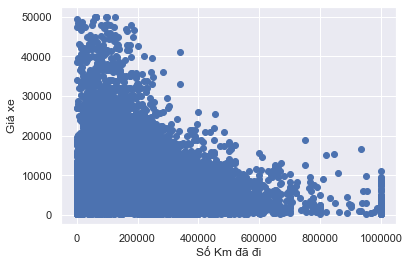

In [240]:
plt.scatter(x=df.odometer,y=df.price)
plt.xlabel("Số Km đã đi")
plt.ylabel("Giá xe");

Theo biểu đồ thì giá xe có xu hướng càng giảm gần khi mà số km đã đi càng tăng

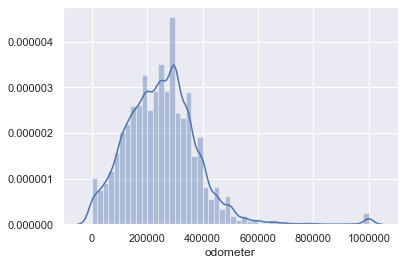

In [241]:
sns.distplot(df.odometer)

<br> Biểu đồ trên là phân phối của số km đã đi của tập dữ liệu, có vẻ số km trên 80,000km có chút bất thường.
<br> Ta thực hiện khảo sát những xe có số km đã đi trên 80,000 và giá xe trên 10,000USD

In [242]:
 df[(df['odometer']>800000) & (df['price'] > 10000)]

,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,bodyType,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price
6020,Mercedes-Benz,Sprinter,mechanical,white,819000,2006,diesel,diesel,2.2,minibus,...,True,False,False,True,False,False,False,True,False,15000.0
19449,Mercedes-Benz,Sprinter,mechanical,grey,860000,2007,diesel,diesel,2.2,minibus,...,False,False,False,False,False,False,False,True,False,10500.0
20429,Volkswagen,Crafter,mechanical,white,845000,2009,diesel,diesel,2.5,minibus,...,False,False,False,False,False,False,False,False,False,15450.0
24481,Mercedes-Benz,Sprinter,mechanical,white,935000,2011,diesel,diesel,2.7,minibus,...,False,False,False,False,False,False,False,True,False,16500.0
26543,Citroen,Jumper,mechanical,other,1000000,2012,diesel,diesel,2.2,van,...,False,False,False,False,False,False,False,False,False,11000.0


Tuy số km đi là rất nhiều nhưng giá xe của những chiếc này cao là hợp lý vì là dòng xe van, thường dùng để chở người , hàng hóa quan trọng.

In [243]:
 df[(df['odometer']>800000) & (df['price'] > 15000)]

,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,bodyType,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price
20429,Volkswagen,Crafter,mechanical,white,845000,2009,diesel,diesel,2.5,minibus,...,False,False,False,False,False,False,False,False,False,15450.0
24481,Mercedes-Benz,Sprinter,mechanical,white,935000,2011,diesel,diesel,2.7,minibus,...,False,False,False,False,False,False,False,True,False,16500.0


#### 7.year

Đây là thuộc tính về năm sản xuất của xe

In [244]:
df[['year']].describe()

,year
count,29971.000000
mean,2003.129859
std,7.515307
min,1960.000000
25%,1998.000000
50%,2003.000000
75%,2009.000000
max,2019.000000


theo thống kê thì da số các xe được bán sản xuất vào năm 2003, năm sản xuất cũ nhất là vào năm 1960 và mới nhất là 2019

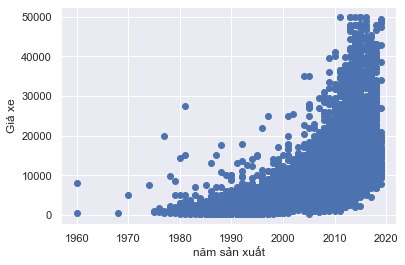

In [245]:
plt.scatter(x=df.year,y=df.price)
plt.xlabel("năm sản xuất"),plt.ylabel("Giá xe");


theo biểu đồ thì xe càng mới thì có xu hướng giá xe càng tăng

Ta sẽ khảo sát những chiếc xe được sản xuất 1960

In [246]:
df[df['year'] == 1960]

,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,bodyType,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price
11083,Skoda,Octavia,mechanical,red,38000,1960,gasoline,gasoline,1.2,coupe,...,False,False,False,False,False,False,False,False,False,400.0
20408,Opel,Kapitan,mechanical,black,111,1960,diesel,diesel,2.5,sedan,...,False,False,False,False,False,False,False,False,False,8000.0


với chiếc xe có mã 11083 có giá là 400USD vì đã quá cũ và chiếc Opel Kaptian là chiếc xe sang trọng do đó có giá khá cao

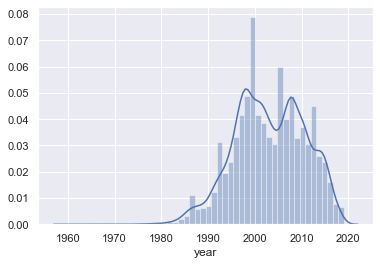

In [247]:
sns.distplot(df['year'])

#### 8. engineFuel

<br> Đây là cột thuộc tính về loại nhiên liệu của động cơ
<br> Tập các giá trị của thuộc tính này là :

In [248]:
df['engineFuel'].value_counts()

gasoline         19067
diesel           10696
hybrid-petrol      198
electric             9
hybrid-diesel        1
Name: engineFuel, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

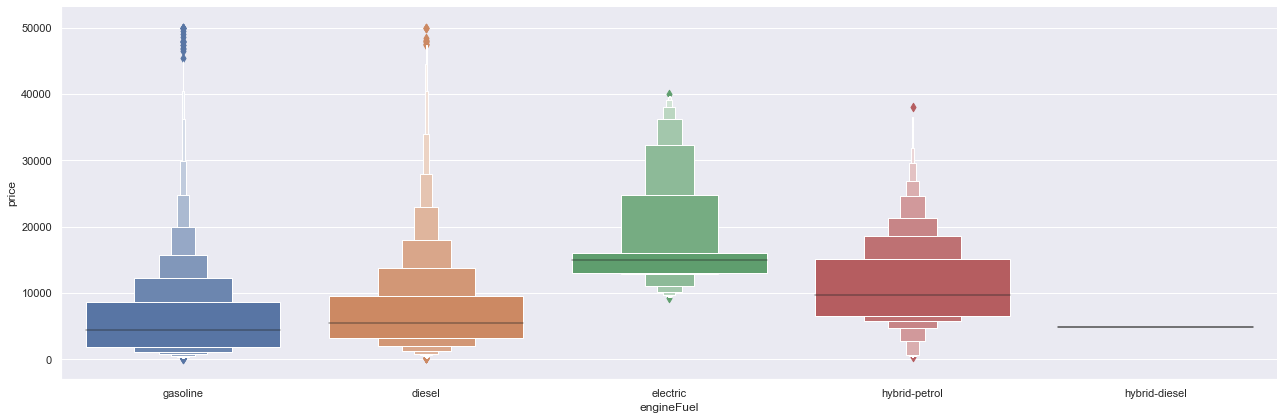

In [249]:
sns.catplot(y='price',x='engineFuel',data= df.sort_values('price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

Trên đây là biểu đồ boxplotcho mỗi loại nhiên liệu theo giá xe.

In [250]:
df[df['engineFuel'] == 'hybrid-diesel']

,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,bodyType,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price
3068,Nissan,200SX,automatic,red,200000,1990,hybrid-diesel,diesel,1.8,coupe,...,True,False,False,True,False,False,False,False,True,4900.0


#### 9. engineType

In [251]:

var = 'engineType'

df[var].value_counts()


gasoline    19265
diesel      10697
electric        9
Name: engineType, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

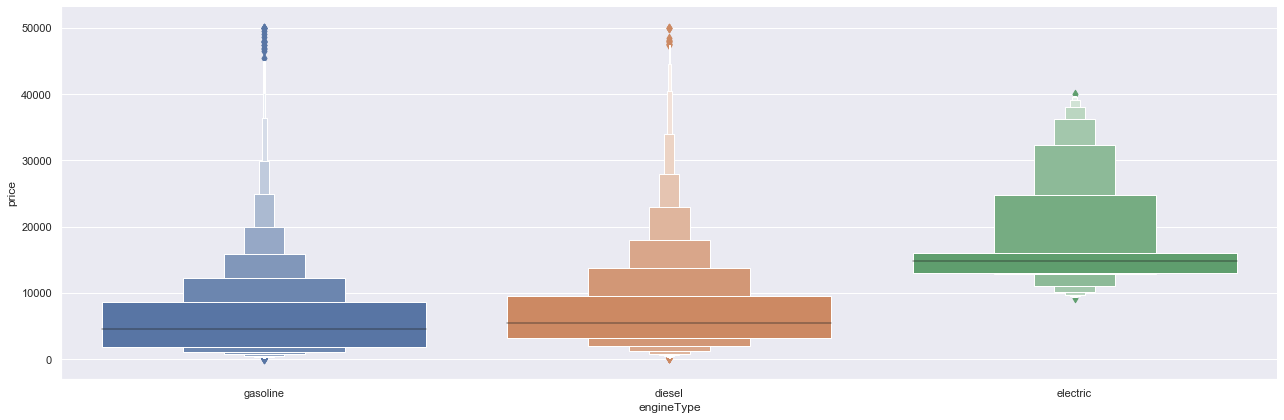

In [252]:
sns.catplot(y='price',x=var,data= df.sort_values('price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

#### 10. engineCapacity

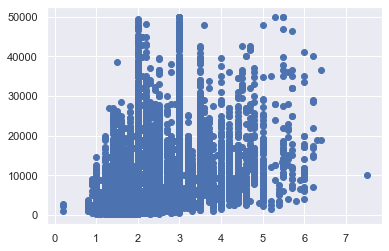

In [253]:
plt.scatter(x=df.engineCapacity,y=df.price)

Theo biểu đồ thì có xu hướng dung tích bình tăng thì giá xe cũng tăng, tuy không được rõ ràng

In [254]:
df.engineCapacity.describe()

count    29971.000000
mean         2.054021
std          0.662481
min          0.200000
25%          1.600000
50%          2.000000
75%          2.200000
max          7.500000
Name: engineCapacity, dtype: float64

Dung tích bình sẽ có trung bình là 2. lít thấp nhất là 0.2 lít và cao nhất là 7.5 lít

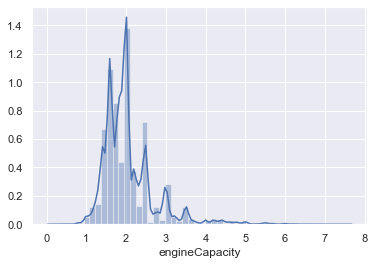

In [255]:
sns.distplot(df.engineCapacity)

In [256]:
df[(df.engineCapacity >=7)  & (df.price <= 10000)]

,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,bodyType,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price
5626,Ford,Econoline,automatic,black,259104,1996,gasoline,gasoline,7.5,minibus,...,True,False,False,False,False,False,False,False,True,10000.0


In [257]:
df[(df.engineCapacity == 0.2)  ]

,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,bodyType,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price
741,Renault,Scenic,mechanical,red,320,1999,gasoline,gasoline,0.2,minivan,...,True,False,False,False,False,False,False,False,True,2299.00
3372,Ford,Mondeo,mechanical,green,350000,1995,gasoline,gasoline,0.2,universal,...,True,False,False,False,False,False,False,False,False,853.65
6235,Mercedes-Benz,E200,mechanical,red,547869,1986,diesel,diesel,0.2,sedan,...,False,False,False,False,False,False,False,False,False,2800.00


#### 11. bodyType

In [258]:
var = 'bodyType'
df[var].value_counts()



sedan        9886
hatchback    6132
universal    4430
suv          3864
minivan      2807
minibus      1084
van           637
coupe         517
liftback      449
pickup         91
cabriolet      63
limousine      11
Name: bodyType, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

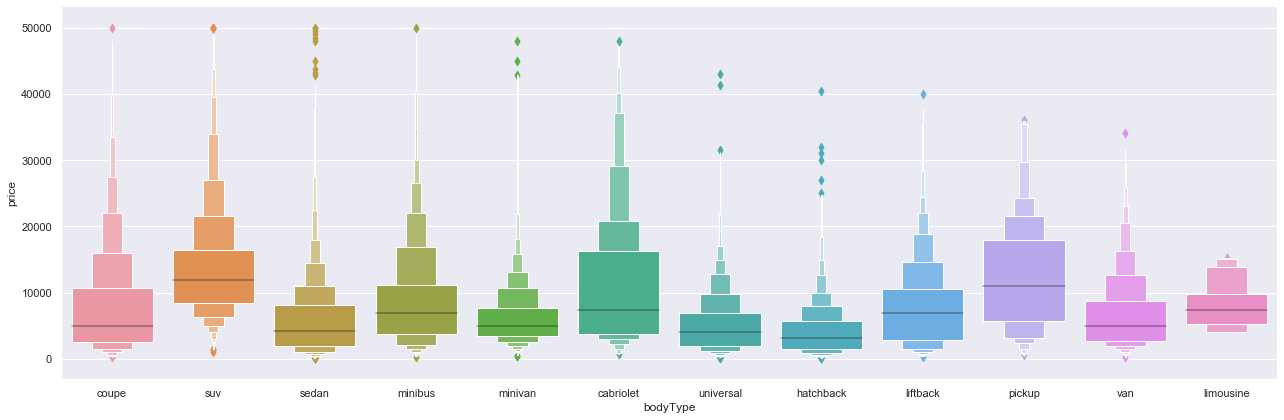

In [259]:
sns.catplot(y='price',x=var,data= df.sort_values('price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [260]:
df[df.bodyType == 'limousine']

,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,bodyType,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price
2681,Lincoln,Town Car,automatic,white,270000,1995,gasoline,gasoline,4.6,limousine,...,True,False,True,True,True,False,True,True,True,4500.0
2869,Lincoln,Town Car,automatic,white,400000,1999,gasoline,gasoline,4.6,limousine,...,False,False,False,True,False,False,False,False,False,4000.0
3394,Lincoln,Town Car,mechanical,white,158000,2003,gasoline,gasoline,4.6,limousine,...,False,False,True,True,True,False,False,False,False,7400.0
6121,Cadillac,De Ville,automatic,black,340000,1998,gasoline,gasoline,4.6,limousine,...,True,False,False,True,True,False,False,True,True,10500.0
6680,Lincoln,Town Car,automatic,black,280000,2000,gasoline,gasoline,4.6,limousine,...,True,False,False,True,False,False,False,True,True,5999.0
14437,Lincoln,Town Car,automatic,white,312142,1996,gasoline,gasoline,4.6,limousine,...,True,True,True,True,True,True,True,True,True,4000.0
16873,Chrysler,300,automatic,white,72420,2006,gasoline,gasoline,3.5,limousine,...,True,True,True,True,True,True,True,True,True,15300.0
17103,Lincoln,Town Car,automatic,white,183245,2003,gasoline,gasoline,4.6,limousine,...,True,True,True,True,True,False,True,True,True,7400.0
19743,Cadillac,De Ville,automatic,white,134000,2001,gasoline,gasoline,4.6,limousine,...,True,False,True,True,False,False,False,True,False,9100.0
22750,Lincoln,Town Car,mechanical,white,666666,2000,gasoline,gasoline,4.6,limousine,...,True,False,False,True,False,False,False,False,True,7800.0


#### 12. Drivetrain

In [261]:
var = 'drivetrain'
df[var].value_counts()


front    21914
all       4032
rear      4025
Name: drivetrain, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

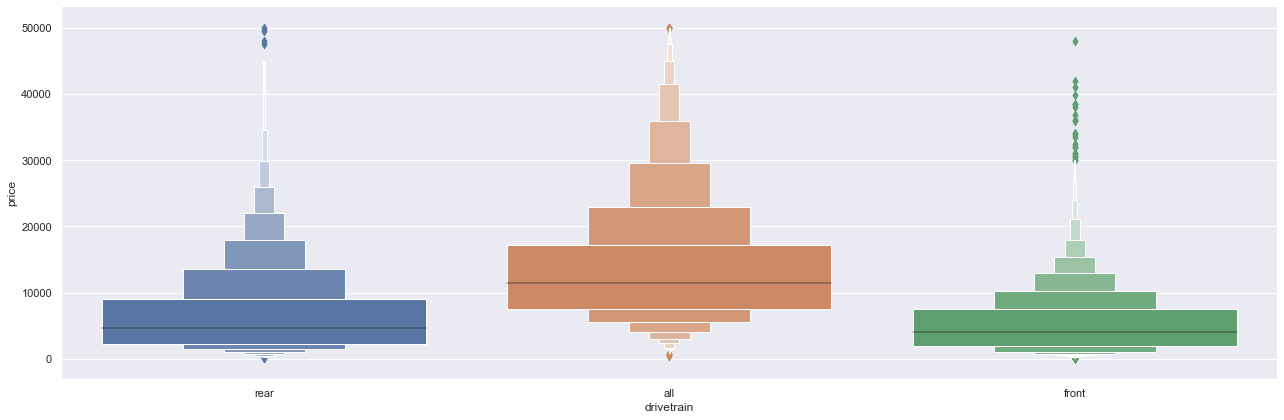

In [262]:
sns.catplot(y='price',x=var,data= df.sort_values('price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [263]:
drivetrain = df[[var]]
drivetrain = pd.get_dummies(drivetrain)

# Feature Engineering

##### 1. Thay năm sản xuất thành tuổi đời của xe

In [264]:

age = df['year'].apply(lambda x : 2020 - x)

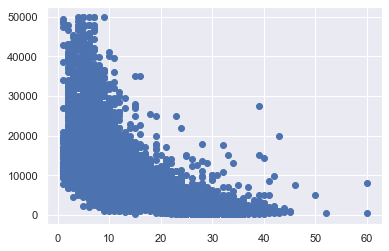

In [265]:
plt.scatter(x=age,y=df.price)

Tương tự như tập dữ liệu theo năm sản xuất thì tuổi xe càng tăng thì giá xe càng giảm một cách rõ ràng

##### 2. Thêm thông tin về tỉ lệ số km đã đi so với tuổi của xe

Thuộc tính này sẽ thể hiện số km đã đi theo tuổi đời của xe, Trên thực tế yếu tố này cũng sẽ ảnh hưởng đến việc lựa chọn một chiếc xe đã qua sử dụng.

In [266]:
km_per_year = df['odometer']/age

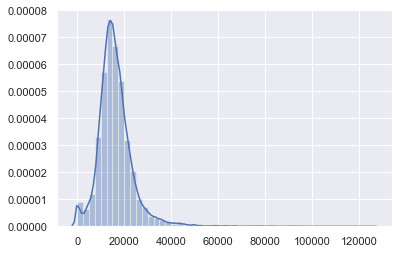

In [267]:
sns.distplot(km_per_year)

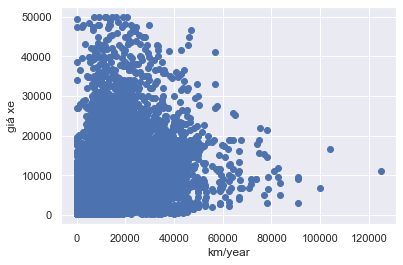

In [268]:
plt.scatter(x=km_per_year,y=df.price)
plt.xlabel("km/year"),plt.ylabel("giá xe");

# Feature Selection

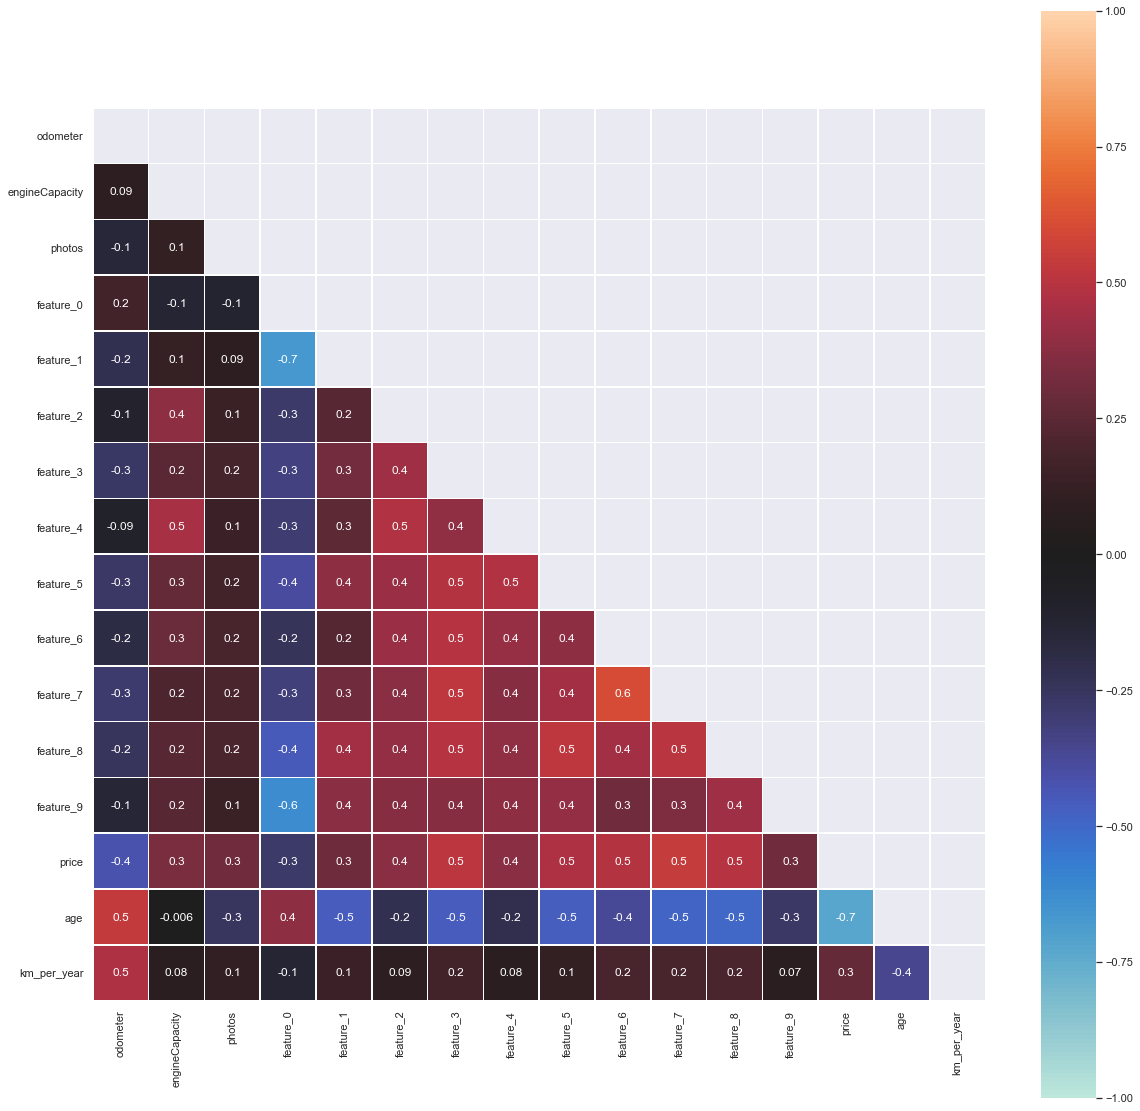

In [269]:
# Create correlation matrix
df.rename(columns={'year':age})
df.drop(['year'],axis = 1,inplace=True)
df['age']=age
df['km_per_year'] = km_per_year


corrMatrix = df.corr()

plt.figure(figsize = (20,20))
sns.heatmap(corrMatrix, annot=True, fmt='.1g', linewidths=.5, vmin=-1, vmax=1, center= 0, square=True, mask=np.triu(corrMatrix))


Theo ma trận covariace thì price có tương quan khá cao với age, tương quan giữa các thuộc tính khác cũng không quá cao nên ta sẽ sử dụng tất cẩ các thuộc tính để huấn luyện mô hình

# Build Model

#### Xử lý các thuộc tính category

Để xử lý các thuộc tính category thì ta sử dụng phương pháp one hot encoding để chuyển dữ liệu sang dạng số. Theo đó từ cột ban đầu ta sẽ chuyển thành các cột binary thuộc tính mới tương ứng với mỗi nhãn của cột ban đầu và giá trị của mỗi dòng thuộc nhãn nào thì cột có nhãn tương ứng sẽ mang giá trị 1 còn lại là giá trị 0. Tuy nhiên ta sẽ loại bớt một cột vì khi tất cả các cột binary có giá trị là 0 thì sẽ thể hiện được giá trị của cột ta đã loại bỏ.

##### 1. manufacturer

In [270]:
# manufacturer 
manufacturer = df[["manufacturer"]]
manufacturer = pd.get_dummies(manufacturer,drop_first= True)
manufacturer.head()


,manufacturer_Alfa Romeo,manufacturer_Audi,manufacturer_BMW,manufacturer_Buick,manufacturer_Cadillac,manufacturer_Chery,manufacturer_Chevrolet,manufacturer_Chrysler,manufacturer_Citroen,manufacturer_Dacia,...,manufacturer_Rover,manufacturer_Saab,manufacturer_Seat,manufacturer_Skoda,manufacturer_SsangYong,manufacturer_Subaru,manufacturer_Suzuki,manufacturer_Toyota,manufacturer_Volkswagen,manufacturer_Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


##### 2.transmission

In [271]:

# transmission
var = 'transmission'
Transmission = df[[var]]
Transmission = pd.get_dummies(Transmission,drop_first= True)
Transmission.head()

,transmission_mechanical
0,0
1,1
2,1
3,1
4,0


##### 3. color

In [272]:
var = 'color'

color = df[[var]]
color = pd.get_dummies(color,drop_first= True)
color.head()

,color_blue,color_brown,color_green,color_grey,color_orange,color_other,color_red,color_silver,color_violet,color_white,color_yellow
0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


##### 4.  engine Fuel

In [273]:
var = 'engineFuel'
engineFuel = df[[var]]
engineFuel = pd.get_dummies(engineFuel).drop('engineFuel_hybrid-diesel',axis = 1)
# ta sẽ lựa chọn loại đi cột binary tương ứng với nhãn hybrid-diesel vì chỉ có 1 dòng dũ liệu có loại nhiên liệu là
engineFuel.head()

,engineFuel_diesel,engineFuel_electric,engineFuel_gasoline,engineFuel_hybrid-petrol
0,0,0,1,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,1,0


##### 5. engine Type

In [274]:
var = 'engineType'
engineType = df[[var]]
engineType = pd.get_dummies(engineType,drop_first =True)
engineType.head()

,engineType_electric,engineType_gasoline
0,0,1
1,0,0
2,0,0
3,0,0
4,0,1


#####  6. body type

In [275]:
var = 'bodyType'
bodyType = df[[var]]
bodyType = pd.get_dummies(bodyType,drop_first= True)
bodyType.head()

,bodyType_coupe,bodyType_hatchback,bodyType_liftback,bodyType_limousine,bodyType_minibus,bodyType_minivan,bodyType_pickup,bodyType_sedan,bodyType_suv,bodyType_universal,bodyType_van
0,0,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0


##### 7. drivertrain

In [276]:
var = 'drivetrain'
drivetrain = df[[var]]
drivetrain = pd.get_dummies(drivetrain,drop_first =True)
drivetrain.head()

,drivetrain_front,drivetrain_rear
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


##### 8. Model

In [277]:
var = 'model'
model = df[[var]]
model = pd.get_dummies(model,drop_first =True)
model.head()

,model_1007,model_100NX,model_106,model_107,model_11,model_110,model_111,model_112,model_116,model_118,...,model_Zafira,model_Zeta,model_i10,model_i20,model_i3,model_i30,model_i40,model_ix20,model_ix35,model_ix55
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Dữ liệu dùng để huấn luyện

Sau khi đã tạo các DataFrame ứng với các cột thuộc tính Category ta nối các Dataframe lại với tập dữ liệu ban đầu để tạo thành DataFrame X dùng để lưu các thuộc tính dùng để huấn luyện mô hình và tạo một dataFrame y lưu giá xe (nhãn) của dữ liệu trong X

In [278]:
X = df.drop(['price'],axis = 1).copy()
X = pd.concat([X,Transmission,drivetrain,bodyType,engineType,manufacturer,color,engineFuel,model],axis=1)

X.drop(["model","manufacturer","transmission","engineType","bodyType","drivetrain","model","engineFuel","color"],axis=1,inplace=True)
X.head()

,odometer,engineCapacity,photos,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,model_Zafira,model_Zeta,model_i10,model_i20,model_i3,model_i30,model_i40,model_ix20,model_ix35,model_ix55
0,48000,2.0,1,False,True,False,False,False,True,False,...,0,0,0,0,0,0,1,0,0,0
1,320000,1.9,13,False,True,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,164000,2.0,14,False,True,False,True,False,False,True,...,0,0,0,0,0,0,0,0,0,0
3,385672,2.5,1,False,True,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,215652,2.4,12,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


Sau khi thực hiện thì ta sẽ có một tập dữ liệu với 1087 cột 

Sau khi phân tích ở trên thì ta sẽ tạo DataFrame y bằng cách biên đổi root cube transform cho cột price

In [279]:
y = df.loc[:,['price']]**(1/3)
y.head()

,price
0,24.933155
1,14.094597
2,25.560666
3,22.239801
4,18.945365


###  Huấn Luyện mô hình

Để huấn luyện và lựa chọn mô hình nhóm sử dụng kĩ thuật cross-validation với Kfold = 10

với tập dữ liệu đã có, ta sẽ chia thành 10 tập nhỏ và mỗi lần huấn luyện sẽ lấy ra 1 tập để test các tập còn lại để train. Sau đó sẽ lấy giá trị độ lỗi Root Mean Square Error (rmse) để đánh giá và lựa chọn mô hình

#####  Mô hình Linear Regression

In [238]:
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn import metrics


model = linear_model.LinearRegression()
kf = KFold(n_splits=10, random_state=82, shuffle=True)
error = []

for train_index, test_index in kf.split(X):       
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train,y_train)      
    
    y_train_pred =  model.predict(X_train)**3
    y_train = y_train**3
    
    y_pred = model.predict(X_test)**3
    y_test = y_test**3
    
    rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    error.append(rmse)
    
    
print("\t\tError Table")
print('Root Mean Squared  Error in training set : ', np.sqrt(metrics.mean_squared_error(y_train_pred , y_train)))
print('Root Mean Squared  Error in test set : ', np.sqrt(metrics.mean_squared_error(y_test , y_pred)))

		Error Table
Root Mean Squared  Error in training set :  1204.0270021082445
Root Mean Squared  Error in test set :  1851.4740494869122


##### mô hình Ridge Regression

Đây là một biến thể của Linear Regression bằng cách bổ sung thêm regularization

Tập hyperparameter nhóm thử:

In [224]:

alphas = np.arange(0.01,1,0.05)
alphas

array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51,
       0.56, 0.61, 0.66, 0.71, 0.76, 0.81, 0.86, 0.91, 0.96])

In [219]:



best_al = 0
min_rmse_test,min_rmse_train = 1e9,1e9
for al in alphas :
    
    model = linear_model.Ridge(alpha = al)
    kf = KFold(n_splits=10, random_state=82, shuffle=True)
    e_in = []
    e_out = []

    for train_index, test_index in kf.split(X):       
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train,y_train)      
        y_train_pred = model.predict(X_train)**3
        y_pred = model.predict(X_test)**3

        y_test = y_test**3
        y_train = y_train **3
        
        e_in.append(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))
        e_out.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
        
        if np.mean(e_out) < min_rmse_test:
            best_al = al
            min_rmse_test = np.mean(e_out) 
            min_rmse_train = np.mean(e_in) 

print("\t\tError Table")
print("Hyperparameter : alpha = ",best_al)
print('Root Mean Squared  Error in training set : ',min_rmse_train)
print('Root Mean Squared  Error in test set : ', min_rmse_test)



		Error Table
Hyperparameter : alpha =  0.31000000000000005
Root Mean Squared  Error in training set :  1276.1548879364202
Root Mean Squared  Error in test set :  1087.9628435884085


Kết quả cho thấy với alpha = 0.31 mô hình sẽ có kết quả tốt nhất.

# Save Model

In [280]:
from joblib import dump, load
from sklearn import linear_model
final_model = linear_model.Ridge(alpha = 0.31)
final_model.fit(X,y)
dump(final_model, 'Model.joblib')

['Model.joblib']

In [281]:
np.save("cols_name.npy",X.columns.values,allow_pickle = True)

# Load Model

In [282]:
from joblib import dump, load
from sklearn import metrics
import numpy as np
import pandas as pd

X = pd.read_csv("X_test.csv")
y = pd.read_csv("Y_test.csv")
cols = np.load('cols_name.npy',allow_pickle=True)



X_test = pd.DataFrame( np.zeros((len(X),len(cols))),columns = cols)


X_test[['odometer','engineCapacity','photos','feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9']]\
=X[['odometer','engineCapacity','photos','feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9']]
X_test.age = X['year'].apply(lambda x : 2020 - x)
X_test.km_per_year =X_test.odometer/X_test.age


for var in ["manufacturer",'transmission','color','engineFuel','engineType', 'bodyType','drivetrain','model']:
    model = pd.get_dummies(X[var],prefix=var)
    drop_name = set(model.columns)  -set(cols[np.char.find(X_test.columns.values.astype('str'),var) == 0])
    model.drop(drop_name,axis = 1,inplace = True)
    X_test.loc[:,list(model.columns)] = model


In [283]:
X_test['engineCapacity'].fillna(X_test['engineCapacity'].median(),inplace = True)

In [284]:
final_model = load('Model.joblib')

In [285]:
y_pred = final_model.predict(X_test)
print("Root Mean Squared  Error ", np.sqrt(metrics.mean_squared_error((y.price) , y_pred**3)))

Root Mean Squared  Error  1971.9737713648603


In [14]:
X_test.isna.values

AttributeError: 'function' object has no attribute 'values'

In [29]:
X_test.isna().sum()

odometer          0
engineCapacity    0
photos            0
feature_0         0
feature_1         0
                 ..
model_i30         0
model_i40         0
model_ix20        0
model_ix35        0
model_ix55        0
Length: 1086, dtype: int64